In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Housing.csv")
price = df['price']
area = df['area']
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [3]:
test = df[['price','area']]
test

price  area
0    13300000  7420
1    12250000  8960
2    12250000  9960
3    12215000  7500
4    11410000  7420
..        ...   ...
540   1820000  3000
541   1767150  2400
542   1750000  3620
543   1750000  2910
544   1750000  3850

[545 rows x 2 columns]

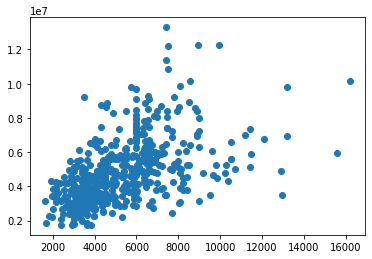

In [4]:
plt.scatter(test['area'],test['price'])
plt.show()

[0.45802469 0.55308642 0.61481481 0.46296296 0.45802469 0.46296296
 0.52962963 1.         0.5        0.35493827 0.81481481 0.37037037
 0.40432099 0.21604938 0.48148148 0.37037037 0.40740741 0.52469136
 0.28395062 0.3962963  0.26666667 0.44166667 0.49691358 0.28148148
 0.54320988 0.4037037  0.37037037 0.54783951 0.49074074 0.33950617
 0.46141975 0.43209877 0.30123457 0.36790123 0.42222222 0.43209877
 0.46185185 0.55555556 0.37037037 0.37037037 0.40432099 0.39259259
 0.4        0.37037037 0.37037037 0.37037037 0.37037037 0.40740741
 0.2654321  0.45925926 0.45925926 0.3904321  0.37037037 0.31790123
 0.37037037 0.37037037 0.70617284 0.55555556 0.47407407 0.37037037
 0.37037037 0.54814815 0.38518519 0.39259259 0.68981481 0.54814815
 0.81481481 0.47530864 0.37037037 0.7462963  0.24691358 0.37037037
 0.30987654 0.40740741 0.24938272 0.26296296 0.3962963  0.40123457
 0.35185185 0.37037037 0.37037037 0.24691358 0.64814815 0.37037037
 0.23209877 0.50925926 0.4117284  0.24444444 0.45740741 0.5296

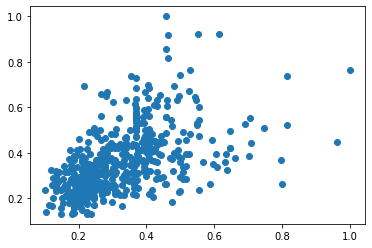

In [5]:
Y = np.array(test.price) / max(test.price)
X = np.array(test.area) / max(test.area)
print(X,Y)
plt.scatter(X,Y)

In [6]:
def costFunction(m,c,X,Y):
    mse = 0
    for i in range(len(X)):
        x,y = X[i],Y[i]
        print(x,y)
        mse += (y - (m*x+c)) ** 2
    return mse/(2*len(test))

def gradientDescent(m,X,Y,l):
    m_grad,c_grad = 0,0
    for i in range(len(test)):
        x,y = X.iloc[i],Y.iloc[i]
        m_grad += -(2/len(test)) * x * (y - (m*x))
        #c_grad += (2/len(test)) * (y - (m*x+c))

    m_ans = m - m_grad * l
    #c_ans = c - c_grad * l
    return m_ans #,c_ans


epoch:  0
0.4580246913580247 1.0
0.5530864197530864 0.9210526315789473
0.6148148148148148 0.9210526315789473
0.46296296296296297 0.9184210526315789
0.4580246913580247 0.8578947368421053
0.46296296296296297 0.8157894736842105
0.5296296296296297 0.7631578947368421
1.0 0.7631578947368421
0.5 0.7421052631578947
0.3549382716049383 0.7368421052631579
0.8148148148148148 0.7368421052631579
0.37037037037037035 0.7278947368421053
0.404320987654321 0.7
0.21604938271604937 0.6947368421052632
0.48148148148148145 0.6947368421052632
0.37037037037037035 0.6842105263157895
0.4074074074074074 0.6842105263157895
0.5246913580246914 0.6736842105263158
0.2839506172839506 0.6684210526315789
0.3962962962962963 0.6657894736842105
0.26666666666666666 0.6578947368421053
0.44166666666666665 0.6526315789473685
0.49691358024691357 0.65
0.2814814814814815 0.65
0.5432098765432098 0.6447368421052632
0.40370370370370373 0.6421052631578947
0.37037037037037035 0.6363157894736842
0.5478395061728395 0.631578947368421
0.490

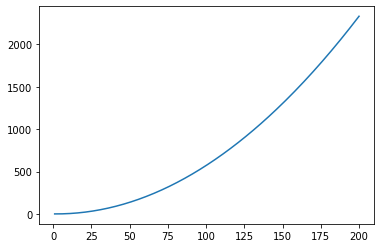

In [7]:
m = 0
c = 0
l = 0.01
epochs = 200
mse_y = []
mse = []

for i in range(epochs):
    if i%50 == 0:
        print("epoch: ",i)
    #m = gradientDescent(m,test,l)
    mse.append(costFunction(m,c,X,Y))
    m+=1
    mse_y.append(m)

print(m,c)

#plt.scatter(X,Y, color='blue')
#plt.plot(X,[m*x for x in X], color='red')
plt.plot(mse_y,mse)
plt.show()

(545, 1) (545, 1)


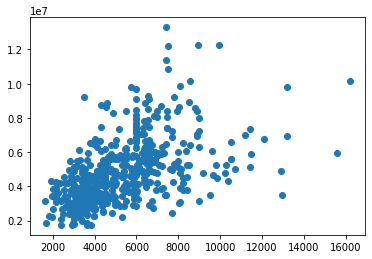

In [21]:
Y = np.array(test.iloc[:,0]).reshape(-1,1) # / max(test.price)
X = np.array(test.iloc[:,1]).reshape(-1,1) # / max(test.area)
print(X.shape,Y.shape)
plt.scatter(X,Y)

[[5621132.74230591]]


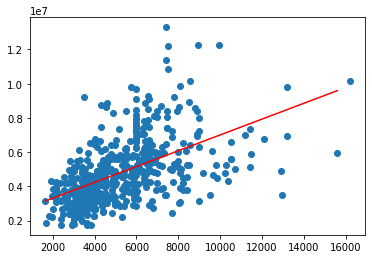

In [9]:
#sklearn model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

print(model.predict(np.array([7000]).reshape(-1,1)))

plt.scatter(X,Y)
plt.plot(np.linspace(1650,15600,545).reshape(-1,1),model.predict(np.linspace(1650,15600,545).reshape(-1,1)),color='red')

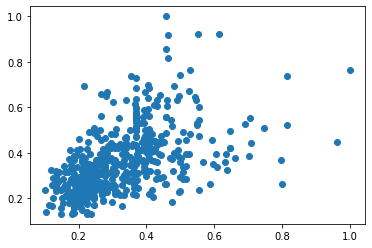

In [10]:
Y = np.array(test.iloc[:,0]).reshape(-1,1)  / max(test.price)
X = np.array(test.iloc[:,1]).reshape(-1,1)  / max(test.area)
plt.scatter(X,Y)

In [11]:
#model 

m,c,l,epochs,n = 0,0,0.01,5000,float(len(X))
cost,epoch = [],[]
for i in range(epochs):
    if i%500 == 0:
        print("epochs:",i)
    y_pred = m*X+c
    d_m = (-2/n)*sum(X*(Y-y_pred))
    d_c = (-2/n)*sum(Y-y_pred)
    m = m - l*d_m
    c = c - l*d_c





epochs: 0
epochs: 500
epochs: 1000
epochs: 1500
epochs: 2000
epochs: 2500
epochs: 3000
epochs: 3500
epochs: 4000
epochs: 4500


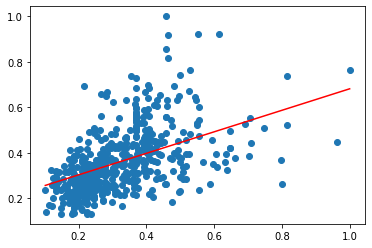

In [12]:
#predictions
y_pred = m*X+c
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')

In [13]:
def function(A,B):
    total_monsters = 0
    ans = []
    for i in A:
        total_monsters += i[1]-i[0]+1
    print(total_monsters)
    for i in B:
        kill_cnt = 0
        pos,power = i[0],i[1]
        for j in A:
            if j[0]<=pos<=j[1] and j[2] < power:
                kill_cnt += 1
        total_monsters = total_monsters-kill_cnt
        ans.append(total_monsters)
        print(kill_cnt)
    print(ans)
N = 3
A = [[1,3,7],[2,5,4],[4,8,6]]
Q = 3
B = [[3,5],[5,8]]
function(A,B)


12
1
2
[11, 9]


In [14]:
def max_str(s):
    ans = ""
    for i in range(len(s)-1,-1,-1):
        ans += s[i]
        s = "".join(reversed(s[:i]))
    print(ans) if len(ans)%2==0 else print(ans[::-1])

max_str("1100")
max_str("10000")

"""
0
0
01
10
100
001
0010
01000

0001 0
001  00
10   000
0    0001
     00010
"""

0101
00010


'\n0\n0\n01\n10\n100\n001\n0010\n01000\n\n0001 0\n001  00\n10   000\n0    0001\n     00010\n'

In [15]:
def solve(A):
        l1,l2,l3,l,r = [],[],[],0,0
        l1.append(A[0])
        l3.append(A[-1])
        for i,v in enumerate(A[1:]):
            if v>0:
                l1.append(v)
                l = i
            else: break
        print(l,l1)
        for i,v in enumerate(A[l+1:len(A)-1][::-1]):
            print(i,v)
            if v>0:
                l3.append(v)
                r = len(A)-1-i
        print(r,l3)

A = [2,-3,-2,4]
solve(A)

0 [2]
0 -2
1 -3
0 [4]


In [16]:
class LinearRegression:
    def __init__(self,l=0.001,epochs=5000):
        self.l = l
        self.epochs = epochs
        self.weight = None
        self.bias = None

    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_prediction = np.dot(X, self.weights) + self.bias
            d_m = (-2/n_samples)*np.dot(X.T, (y-y_prediction))
            d_c = (-2/n_samples)*np.sum((y-y_prediction))
            self.weights = self.weights - self.l*d_m
            self.bias = self.bias - self.l*d_c

    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        return linear_predictions
    
    def mse(self,Y,y):
        return np.mean((Y-y)**2)
            

450.22400637562777


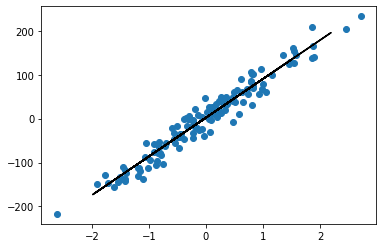

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X,y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test,predictions,color='black')
print(model.mse(y_test,predictions))

In [18]:
print(X)

[[ 1.85227818]
 [ 0.47359243]
 [-1.23086432]
 [ 0.62566735]
 [-0.07201012]
 [ 0.81252582]
 [-0.18565898]
 [-0.81581028]
 [ 0.06023021]
 [ 0.65655361]
 [ 2.46324211]
 [ 1.0035329 ]
 [-0.26465683]
 [-0.23458713]
 [-0.56228753]
 [ 0.29698467]
 [ 0.08704707]
 [ 1.45353408]
 [-0.97468167]
 [-1.4123037 ]
 [-0.50347565]
 [-0.07710171]
 [ 0.38531738]
 [-1.40185106]
 [-0.07282891]
 [ 0.34115197]
 [ 0.8219025 ]
 [-0.44651495]
 [-0.46947439]
 [ 1.86577451]
 [-1.42474819]
 [-0.60170661]
 [ 0.82254491]
 [-0.46341769]
 [ 0.96337613]
 [ 1.52302986]
 [-0.5297602 ]
 [-1.32045661]
 [-0.99053633]
 [ 0.15372511]
 [-0.01349722]
 [ 1.03099952]
 [ 0.75193303]
 [ 1.47789404]
 [ 0.17457781]
 [-1.24573878]
 [ 0.2088636 ]
 [-0.82068232]
 [ 0.17136828]
 [-0.90802408]
 [ 0.52194157]
 [-1.60748323]
 [ 0.19686124]
 [ 0.00511346]
 [-0.30921238]
 [ 1.14282281]
 [-0.56629773]
 [ 0.97554513]
 [-1.41537074]
 [-0.78325329]
 [ 0.29612028]
 [-1.23695071]
 [ 0.73846658]
 [ 0.01300189]
 [ 0.54256004]
 [-0.68002472]
 [ 0.24196

In [19]:
print(X.shape)

(200, 1)
